In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rc('font', family='NanumBarunGothic')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일이 저장된 폴더 경로
folder_path = '/content/drive/MyDrive/DB프로젝트/data_csv/result_EnergyGeneration'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
columns_to_read = ['총발전량 사업자+한전구입 소계', '사업자(종합) 총계', '상용자가 한전구입 소계']

# 해당 폴더 내의 모든 CSV 파일 목록
file_list = sorted([f for f in os.listdir(folder_path) if f.startswith('result_EnergyGeneration') and f.endswith('.csv')])

# 첫 번째 행의 데이터를 저장할 빈 데이터프레임 생성
first_row_data = pd.DataFrame()

# 각 파일의 첫 번째 행의 데이터를 읽어와서 빈 데이터프레임에 추가
for file in file_list:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, usecols=columns_to_read, nrows=1)  # 첫 번째 행만 읽기
    first_row_data = pd.concat([first_row_data, data])

# 인덱스를 '2012'부터 '2022'까지 변경
first_row_data.index = [str(year) for year in range(2015, 2023)]

# 데이터프레임 출력
print(first_row_data)

      사업자(종합) 총계  상용자가 한전구입 소계  총발전량 사업자+한전구입 소계
2015   527514837        576355         528091193
2016   540220436        220419         540440854
2017   553225602        304506         553530107
2018   569847656        798850         570646507
2019   561893899       1146405         563040305
2020   550485720       1676440         552162160
2021   575785550       1023939         576809488
2022   593949322        451043         594400365


In [10]:
first_row_data.columns = ['발전량', '구입', '총 발전량']

In [11]:
first_row_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2015 to 2022
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   발전량     8 non-null      int64
 1   구입      8 non-null      int64
 2   총 발전량   8 non-null      int64
dtypes: int64(3)
memory usage: 256.0+ bytes


In [12]:
first_row_data.to_csv('/content/drive/MyDrive/DB프로젝트/data_csv/result_Data/result_EnergyGeneration.csv')

# **년도별 에너지 발전량**

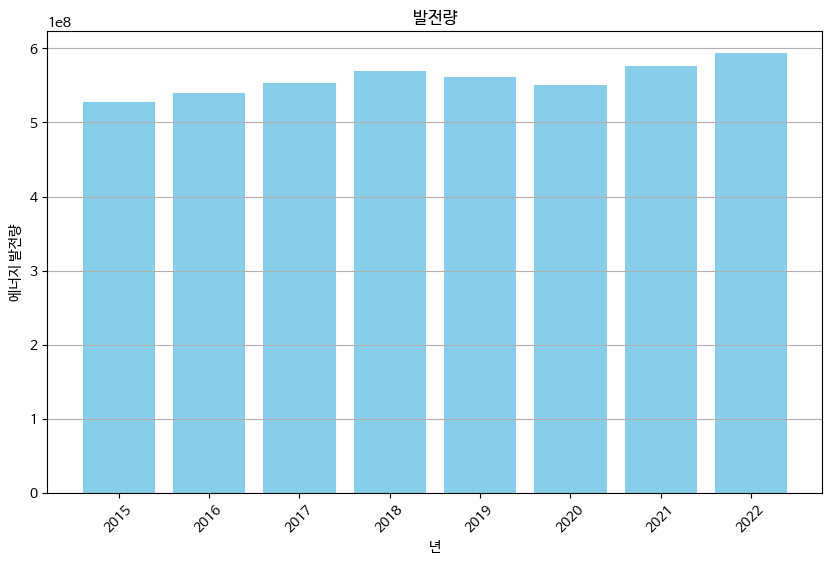

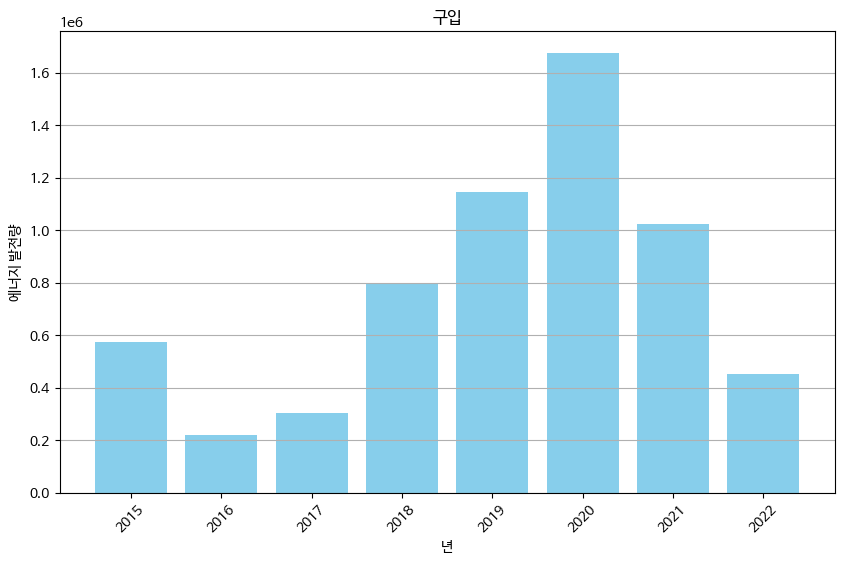

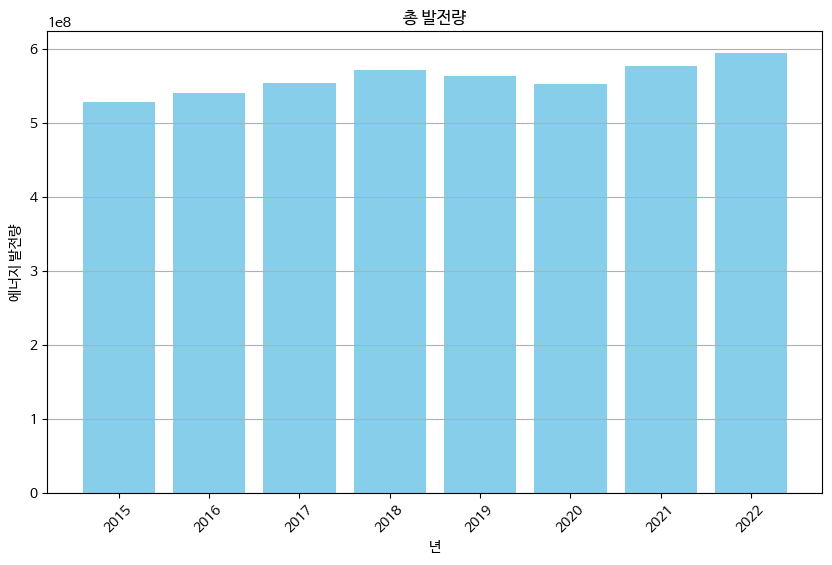

In [13]:
for column in first_row_data.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(first_row_data.index, first_row_data[column], color='skyblue')
    plt.title(column)
    plt.xlabel('년')
    plt.ylabel('에너지 발전량')

    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#**꺾은선 그래프**

전부

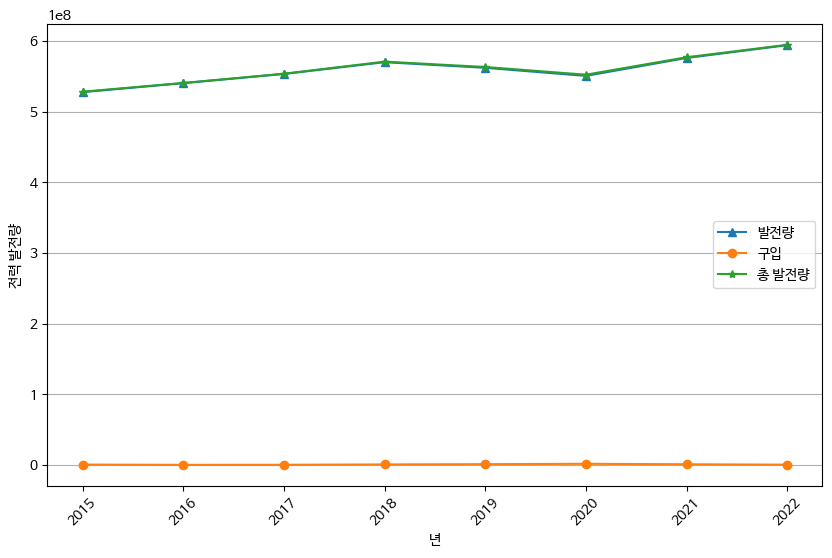

In [27]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=[])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

markerList = ['^', 'o', '*']

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for idx, column in enumerate(data_without_total.columns):
    plt.plot(data_without_total.index, data_without_total[column], marker=markerList[idx % len(markerList)], label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.ylabel('전력 발전량')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()